<a href="https://colab.research.google.com/github/davis689/binder/blob/master/CHEM451/Critical_Points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set-up


Import some key functions from SymPy to handle symbolic manipulations.

In [1]:
from sympy import diff, integrate, solve, Eq, symbols, Symbol, init_printing # we can import all of sympy but these are enough
from sympy.plotting import plot
init_printing()

In [2]:
p,V,T,pc,Vc,Tc,pr,Vr,Tr=symbols("p,V_m,T,p_c,V_c,T_c,p_r,V_r,T_r",positive=True, real=True) # Setup variables
R,a,b=symbols("R, a, b", positive=True,real=True,constant=True) # Setup constants

We *could* define each variable separately or leave out the ```positive=True,real=True```... portions. Defining a bunch of them at once is just convenient. Separating them into appropriate categories where we expect them to be positive or real or whatever is useful because when the system is asked to solve or take a square root, it will simplify the answer. It may be obvious to us that we're not considering negative pressures or imaginary gas constants, but it's not obvious to the computer and eliminating those possibilities makes it easier to come to a general answer. In many cases, leaving off the assumptions works just fine but it doesn't cost much to categorize them this way and it might save a lot of hassle in the other cases.



## Critical Point
The critical point is the temperature, pressure and volume where the isotherm goes through an inflection point. Since at an inflection point the first and second derivatives are zero, we can use these equations plus the equation of state to solve for the critical parameters. Here we'll do this symbolically. You can (and should) do this all on paper to make sure you know how it's working.

First we set up the equation of state.



In [54]:
p_eos=R*T/(V-b)-a/V**2
#p_eos=R*T/(V-b)-a/(sp.sqrt(T)*V*(V+b))

Taking derivatives uses ```diff```. We can take the first derivative using ```diff(p_expr,V)```. A second derivative can be ```diff(diff(p_expr,V),V)``` by chaining two ```diff``` commands together or we can use ```diff(p_expr,V,2)``` where the 2 directs the computer to take a 2nd derivative.

**Take the first and second derivative and verify that it's right.**

Here we set up the equations using SymPy's Eq function. Here the parentheses are filled with both sides of the equation separated by a comma. The results are displayed.

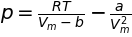

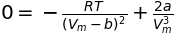

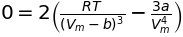

In [55]:
p_eq=Eq(p,p_eos) #vdw equation
dp_eq=Eq(0,diff(p_eq.rhs,V)) # first derivative set to zero
ddp_eq=Eq(0,diff(p_eq.rhs,V,2)) # second derivative set to zero
display(p_eq,dp_eq,ddp_eq) # display them all


Now to solve for the critical parameters, we use solve. The answer to the solve function is always a list. Since we're only expecting one solution set, the , after critpoint makes solve only return the solution rather than a list of them. 

In [56]:
critpoint,=solve([p_eq,dp_eq,ddp_eq],[p,V,T]) # solve for p, V, and T
pc,vc,tc=symbols('p_c V_c T_c') # lower-case symbols for the left-hand-side of the equations.
Pc,Vc,Tc=[critpoint[i] for i in range(len(critpoint))] # upper-case for the rhs. Each part of the solution set (p, V, and T) is assigned to a variable.
display(Eq(pc,Pc))
display(Eq(vc,Vc))
display(Eq(tc,Tc))

## Law of Corresponding States
Since we have the critical temperatures, pressures, and volumes in terms of van der Waals parameters, we can use them to find a real gas equation of state that is the same for all gases. First define *reduced* variables, $p_r$, $V_r$, and $T_r$ such that $p_r=p/p_c$, $V_r=V/V_c$, and $T_r=T/T_c$. Use these definitions to substitute for $p, V$, and $T$.
The result is an equation that has no $a$ or $b$ parameters. It says that as a fraction of the way to the critical point, every gas behaves the same. Of course, he applicability of this equation depends on the applicability of the equation of state we've chosen.

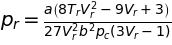

In [57]:
Vr,pr,Tr=sp.symbols("V_r,p_r,T_r")
cs_eos=sp.Eq(p_eos.subs({V:Vc*Vr,T:Tc*Tr}).subs({Tc:Tc,Vc:Vc}),pc*pr.subs(pc,pc))# Setup equation and substitute reduced and critical values into it.
lcs=sp.Eq(pr,solve(cs_eos,pr)[0]) # solve equation for pr (which will result in only the right hand side of the equation) and write as an equation.
display(lcs)

Do this all again for a different equation of state (not the ideal gas equation of state).